## Bernstein-Vaziraniのアルゴリズム

### 概要
以下のような関数$f_a : \{0, 1\}^n \rightarrow \{0, 1\}$を考えます。

$f_a(x) = a \cdot x\quad mod \quad 2$

Bernstein-Vaziraniアルゴリズムを使うと１回の量子回路実行により$f_a(x)$で定められたビット列$a$を求めることができます。

なお、$a, x \in \{0, 1\}^n$はnbitのバイナリ列である。$f_a(x)$は外から知ることができないブラックボックスであるが、任意の入力$x \in \{0, 1\}^n$に対して値を返すものとする。


In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

In [7]:
def bv_oracle(n):

    oracle_qc = QuantumCircuit(n)
    #zゲートのためのバイナリ列
    b = np.random.randint(1, 2**n)
    b_str = format(b, "0="+str(n)+"b")

    for qubit in range(len(b_str)):
        if b_str[qubit] == "1":
            oracle_qc.z(qubit)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"

    print("oracle is cleated. Binary : {}".format(b_str[::-1]))

    return oracle_gate


In [34]:
def bv_algo(n):
    bv_qc = QuantumCircuit(n, n)

    bv_qc.h(range(n))

    oracle_gate = bv_oracle(n)
    bv_qc.append(oracle_gate, range(n))

    
    bv_qc.h(range(n))

    bv_qc.measure(range(n), range(n))

    return bv_qc

oracle is cleated. Binary : 0011


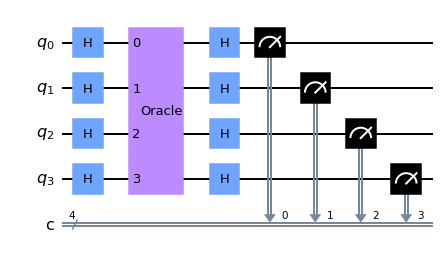

In [35]:
from qiskit.visualization import plot_histogram
n = 4
bv_circuit = bv_algo(n)
bv_circuit.draw(output="mpl")

In [25]:
def get_count(qc, back_end="qasm_simulator", shots = 1024):
    back_end = Aer.get_backend(back_end)
    results = execute(qc, backend=back_end, shots=shots).result()
    count_num = results.get_counts()
    return count_num

{'0000': 1024}


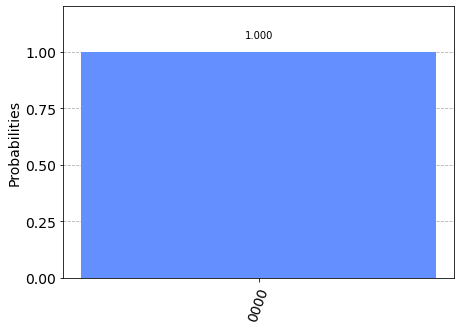

In [27]:
count_num = get_count(bv_circuit)
print(count_num)
plot_histogram(count_num)

In [36]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
from qiskit import transpile
shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


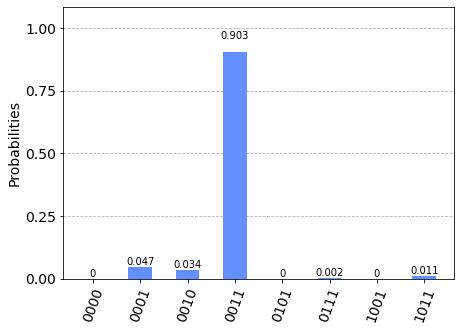

In [37]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [18]:
def bv_oracle_full(n=5):
    
    oracle_qc = QuantumCircuit(n)
    #zゲートのためのバイナリ列
    b = "0011"
    b = b[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n-1):
        if b[q] == '0':
            oracle_qc.i(q)
        else:
            oracle_qc.cx(q, n-1)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"

    #print("oracle is cleated. Binary : {}".format(b_str[::-1]))

    return oracle_gate

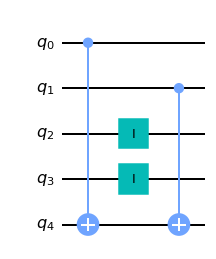

In [6]:
n = 5
oracle_qc = QuantumCircuit(n)
#zゲートのためのバイナリ列
b = "0011"
b = b[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n-1):
    if b[q] == '0':
        oracle_qc.i(q)
    else:
        oracle_qc.cx(q, n-1)

oracle_qc.draw(output="mpl")

In [22]:
def bv_algo(n=5):
    bv_qc = QuantumCircuit(n, n-1)

    bv_qc.h(range(n))
    bv_qc.z(n-1)

    oracle_gate = bv_oracle_full()
    bv_qc.append(oracle_gate, range(n))

    
    bv_qc.h(range(n-1))

    bv_qc.measure(range(n-1), range(n-1))

    return bv_qc

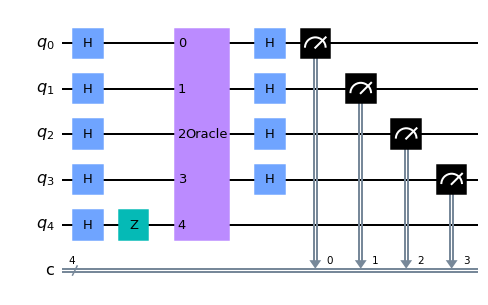

In [20]:
n = 5
bv_qc = QuantumCircuit(n, n-1)

bv_qc.h(range(n))
bv_qc.z(n-1)

oracle_gate = bv_oracle_full()
bv_qc.append(oracle_gate, range(n))


bv_qc.h(range(n-1))

bv_qc.measure(range(n-1), range(n-1))
bv_qc.draw(output="mpl")

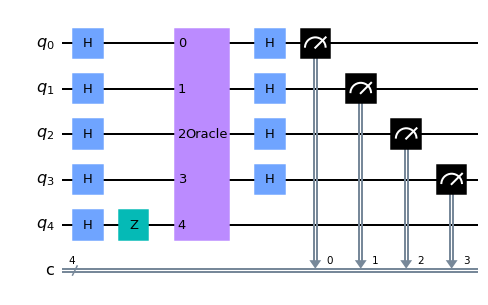

In [24]:
from qiskit.visualization import plot_histogram
n = 4
bv_circuit = bv_algo()
bv_circuit.draw(output="mpl")

{'0011': 1024}


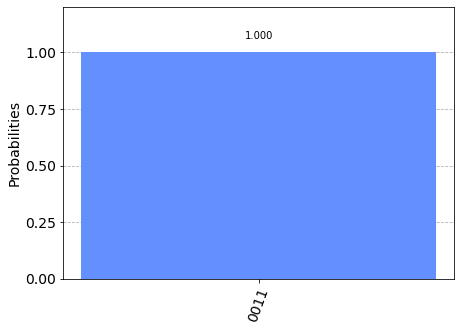

In [26]:
count_num = get_count(bv_circuit)
print(count_num)
plot_histogram(count_num)

In [30]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 5 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-07-15 02:40:31,976: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima


In [31]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
from qiskit import transpile
shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


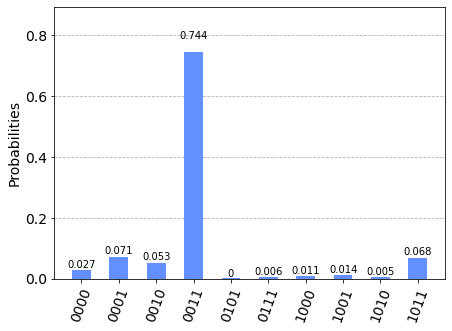

In [32]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)